# **Transformer model replicate** 🤖
This notebook will go through all layers of a transformer model as outlined in the paper "*Attention is all you need*" from 2017 (https://doi.org/10.48550/arXiv.1706.03762). The purpose of this work is to provide a **intuitive overview** of how a **transformer model** works in NLP task, making it easier for **future reference** and works build upon it.

This will be the architecture referenced in this work.

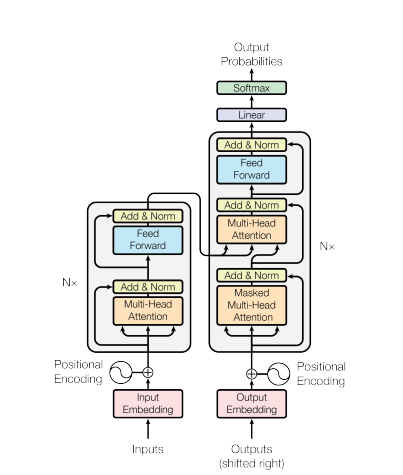

Source: https://doi.org/10.48550/arXiv.1706.03762

### Step 1: Preparing input to be processed

In [ ]:
# Downloading shakespear dataset from Andrej Kaparthy to use as input throught this work.
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-10-29 12:33:34--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2023-10-29 12:33:34 (102 MB/s) - ‘input.txt.1’ saved [1115394/1115394]



In [ ]:
with open('input.txt', 'r', encoding = 'utf-8') as f:
  text = f.read()

In [ ]:
print(f"Length of characters in this dataset: {len(text)}")

Length of characters in this dataset: 1115394


In [ ]:
# First thousand character to help visualise structure of data
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [ ]:
# All unique characters in this corpus of text
chars = sorted(list(set(text)))
vocab_size  = len(chars)
print(f"Types of vocabulary: {''.join(chars)}")
print(f"\nVocabulary size: {vocab_size}")

Types of vocabulary: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz

Vocabulary size: 65


**Input embedding** is where we tokenize our raw input text into tokens, then we introduce numerical numerical encoding to transform these tokens into numerical representation, after that we introduce embedding (*imagine this as a mapping where related words are closer together*) into our representation as a means to capture or showcase the semantic meaning of our input.

**Positional encoding** is where we introduce additional information on our embedding where we introduce the positional information of tokens in our raw text to allow our model to have more context to learn the relationship between our tokens. Example of importance of positional context is "*Bob hit Jane*" and "*Jane hit Bob*"

## Tokenization 🪙
Tokenization is a crucial **pre-processing** step in Natural Language Processing (NLP) and Machine Learning (ML). Its primary goal is to **break down a text** into smaller pieces called tokens, these tokens can be in the form of words, subwords or even characters. By doing so, we transform raw text into a **structured format** which enables that can be easily analyzed or fed into ML models.

In the following code we will be performing **character level tokenisation**. Benefits of doing tokenisation on a character level is because it's return is more fine grained which enables:


*   Perform better for **Out-of-vocabulary (OOV) words**
*   Perform better in the case with **spelling error**
*   What might be some of the **disadvantage** of character level tokenisation?

*Since we are making a lightweight transformer model, we replace the input encoding & postional embedding with just a mapping from string to integer as shown below, to accomodate for the semantic meaning that normally is provided by embedding, we will allow the ML model to train to find the relationship between each integer.*

In [ ]:
# Create mapping from character to integer and vice versa (try to print it out so you have more intuition on how the mapping looks like)
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}

# Encode and decode accepts a paramater and transform them into either words or integer depending on the mapping we have.
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join(itos[i] for i in l)

print(encode('Hii there'))
print(decode(encode('Hii there')))

[20, 47, 47, 1, 58, 46, 43, 56, 43]
Hii there


## Fit the encoded text dataset into a tensor. 🔢

Why do we use a tensor: Tensors are the format of input modern machine learning frameworks and hardware (GPU / TPU) are build to accept, it is flexible as it is able to accomodate different types (dimentionality) of input by altering it's dimentionality for different situations thus making it robust and suitable for different scenarios.

In [ ]:
import torch
data = torch.tensor(encode(text), dtype = torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [ ]:
# Split our data into training and validation set.
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

In [ ]:
val_data

tensor([12,  0,  0,  ..., 45,  8,  0])

# Decoder Architecture 🔓
Now let's move on to the Decoder side (*right side*) of the architecture, a transformer can be described as autoregressive or "*next best-guesser*", we achieve this by shifing our guessing target to the right (the next word in a sentence) and use words from previous temporal sequence as context to guess the next word, any future tokens are masked so our model does not depend on future information, as in real life example, words are generated from left to right, and only context we will have will be from previous temporal sequence.

In [ ]:
# We initialise our block size as 8 tokens, and include an extra token as target for the last iteration
block_size = 8
train_data[:block_size + 1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [ ]:
# Visualisation of how the model (autoregression) works
x = train_data[:block_size]
y = train_data[1:block_size + 1] # offset of x by 1
for t in range(block_size):
  context = x[:t+1]
  target = y[t]

  print(f"When context is {context}, the target will be: {target}")

When context is tensor([18]), the target will be: 47
When context is tensor([18, 47]), the target will be: 56
When context is tensor([18, 47, 56]), the target will be: 57
When context is tensor([18, 47, 56, 57]), the target will be: 58
When context is tensor([18, 47, 56, 57, 58]), the target will be: 1
When context is tensor([18, 47, 56, 57, 58,  1]), the target will be: 15
When context is tensor([18, 47, 56, 57, 58,  1, 15]), the target will be: 47
When context is tensor([18, 47, 56, 57, 58,  1, 15, 47]), the target will be: 58


In [ ]:
torch.manual_seed(1337) # ensure reproducibility

# batch_size specifies how many sequences can be processed parallely
# block_size specifies the length of each sequence.
batch_size = 4
block_size = 8

def get_batch(split):
  data = train_data if split == "train" else val_data

  # Generate random numbers to act as starting indices for extracting sequences from data
  ix = torch.randint(len(data) - block_size, (batch_size, ))

  # Stack the sequence to form a batch, resulting in a tensor of dimensionality (4, 8)
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1: i+block_size+1] for i in ix])

  return x,y

xb, yb = get_batch("train")
print("Input: ")
print(xb.shape)
print(xb)
print("Output: ")
print(yb.shape)
print(yb)
print("----")

# Iterating through each sequence in the batch and each token in the sequence to provide an intuitive example of how the architecture will work.
for b in range(batch_size):
  for t in range(block_size):
    context = xb[b, : t+1]
    target = yb[b, t]
    print(f"When context is {context.tolist()}, target is: {target}")

Input: 
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
Output: 
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
When context is [24], target is: 43
When context is [24, 43], target is: 58
When context is [24, 43, 58], target is: 5
When context is [24, 43, 58, 5], target is: 57
When context is [24, 43, 58, 5, 57], target is: 1
When context is [24, 43, 58, 5, 57, 1], target is: 46
When context is [24, 43, 58, 5, 57, 1, 46], target is: 43
When context is [24, 43, 58, 5, 57, 1, 46, 43], target is: 39
When context is [44], target is: 53
When context is [44, 53], target is: 56
When context is [44, 53, 56], target is: 1
When context is [44, 53, 56, 1], target is: 58
When context is [44, 53, 56, 1, 58], target is

### **Embeddings** 🗺: A method that we use to capture semantic meaning of token (*imagine each token as a point on a graph, and the closer the meaning are, they are closer in the graph*). The embedding table can be trained to better reflect the semantic meaning of our tokens in our original source.
### Benefits of embedding include:

* **Reduce dimensionality** (*Compared to one-hot encoding, embedding significantly reduces the dimensionality of the representation, making the model more computationally efficient*)
* **Provide semantic meaning of tokens**


### **Since embeddings can already help us to predict the next text based on previous input, why do we still want to proceed with a transformer model?**

Hint: *Embedding only takes previous input as context and predict the next word, and doesn't take into account the position of a token in the input, this is particularly fatal in real life scenarios where positions of tokens in the input matters a lot, so to overcome this the transformer model utilises a mechanism called attention mechanism where we can give attention to certain tokens in the input based on the context. You will look at the implementation of this below.*

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

# BigramLangaugeModel is a type of auto regressive model
class BigramLanguageModel(nn.Module):


  def __init__(self, vocab_size):
    super().__init__()

    # we are creating a embedding table of vocab_size x vocab_size, the table can at one time accomodate up to vocab_size amounts of tensor, and the embedding of each token will produce a tensor of vocab_size
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets = None):

    # Logits describes the output of the embedding table, each token is transformed into a small array of tensor.
    # Dimention of the tensor produced is 4, 8, 65, which coresponds to batch, time, channel
    # batch coresponds to batch, time coresponds to how much elements we have in our batch, channel describes the ammount of vocab present in or example
    logits = self.token_embedding_table(idx)

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # transforming the dimentions of logits and targets to fit into cross entropy
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      # since we have 65 possible characters we can expect the loss to be -ln(1/65) = 4.1744
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  # idx represents current context
  def generate(self, idx, max_new_tokens):
    # idx is (B, T) array of indices in the current context
    for _ in range(max_new_tokens):
      # get the predictions
      logits, loss = self(idx)
      # focus only on the last step time
      logits = logits[:, -1, :] # becomes (B, C)
      # apply softmax to get probabilities
      probs = F.softmax(logits, dim = -1) # (B, C)
      # sample from the distribution
      idx_next = torch.multinomial(probs, num_samples = 1) # (B, 1)
      # append sampled index to the running sequence
      idx = torch.cat((idx, idx_next), dim = 1) # (B, T+1)

    return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)
idx = torch.zeros((1, 1), dtype = torch.long)
print(f"OUTPUT: {decode(m.generate(idx , max_new_tokens = 100) [0].tolist())}")

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)
OUTPUT: 
Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [ ]:
# Sample code for visualisation (can delete)
input = torch.LongTensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46]])
embedding = nn.Embedding(65,65)
print(input.shape)
print(embedding(input))

torch.Size([3, 8])
tensor([[[ 0.4172,  0.6341, -1.8520,  ..., -0.2470, -0.2635, -0.3246],
         [ 2.0899, -0.5252, -0.4697,  ...,  1.4875,  0.6625,  2.5883],
         [ 0.8344,  0.4827,  0.3213,  ..., -0.6506,  0.5397, -0.4693],
         ...,
         [-0.5503,  0.2455, -0.8105,  ..., -0.4715,  0.8078, -0.5746],
         [ 0.4172,  0.6341, -1.8520,  ..., -0.2470, -0.2635, -0.3246],
         [-1.2475,  1.4073,  0.8347,  ...,  1.5332,  0.6859, -1.7034]],

        [[-0.6346,  1.3676,  0.1808,  ..., -1.2020,  0.5384,  0.2382],
         [ 0.6130, -1.6943, -2.7913,  ...,  1.4943, -3.3042, -1.9279],
         [ 0.8603, -0.2675, -0.4354,  ..., -0.1845, -1.0497, -0.8261],
         ...,
         [-1.2475,  1.4073,  0.8347,  ...,  1.5332,  0.6859, -1.7034],
         [ 2.0899, -0.5252, -0.4697,  ...,  1.4875,  0.6625,  2.5883],
         [ 0.8603, -0.2675, -0.4354,  ..., -0.1845, -1.0497, -0.8261]],

        [[ 2.0899, -0.5252, -0.4697,  ...,  1.4875,  0.6625,  2.5883],
         [ 0.8603, -0.2675

In [ ]:
# Create a PyTorch Optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-3)

In [ ]:
# Training step
batch_size = 32
for steps in range(1000):

  # sample a batch of data
  xb, yb = get_batch('train')

  # evaluate the loss
  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none = True)
  # Back propogate error to compute gradient
  loss.backward()
  # Update parameter
  optimizer.step()

print(loss.item())

2.398350715637207


In [ ]:
# Output after optimisation
# generate method takes in idx (context after decode & embed) and macx tokens, generates -> idx(context in numerical for similar to output of encode)]
# decode transform idx/ context into string form
#
print(f"OUTPUT: {decode(m.generate(idx , max_new_tokens = 500) [0].tolist())}")

OUTPUT: 
ffes be thes wh sicod -ey'd.
BRRoBouan.-d?
We?Ed nugragze, Nons
SI, goureerr; Sarowhid nd. y t, Puem!
The patyJ;
WivPO:

Fr ETLe?
BHy thighe as IOMBu pys seave
Clilt aleachase whedx?
TheYINe IUEOnthid bllouessjel.
CHuQUhe

NDUNThps.
I cthouthesere angCOWhe he et


Aweintino g f?auspeve; co d dnd cn t ly.
T:atwin iORherenownd, ben n;
A ishor thllorye

ATo crin at thkeaj
RIASTHor.
AndansD: RI Wnd.fain--veal.

Mucol BLOLEEm, cr m e s t ng cars
Bulfave frd fo ban!.
TENDWhitatedderf$RWAUME;
Pa,

st:'
